In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [4]:

df_train = pd.read_csv("/kaggle/input/training/train_set.csv")
df_test = pd.read_csv("/kaggle/input/training/test_set.csv")
df_val = pd.read_csv("/kaggle/input/training/val_set.csv")

In [5]:
df_train.index = pd.to_datetime(df_train['date_time_IST'],format = '%d-%m-%Y %H:%M')
df_test.index = pd.to_datetime(df_test['date_time_IST'],format = '%d-%m-%Y %H:%M')
df_val.index = pd.to_datetime(df_val['date_time_IST'],format = '%d-%m-%Y %H:%M')



In [6]:
'''removing only the date_time_IST column and keeping everything else'''
df_train = df_train.drop(columns=['30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type', '3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond','date_time_IST','30min_vsby_km', '1hr_vsby_km', '1.5hr_vsby_km',
       '2hr_vsby_km', '2.5hr_vsby_km', '6hr_vsby_km'])
df_test = df_test.drop(columns=['30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type', '3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond','date_time_IST','30min_vsby_km', '1hr_vsby_km', '1.5hr_vsby_km',
       '2hr_vsby_km', '2.5hr_vsby_km', '6hr_vsby_km'])
df_val = df_val.drop(columns=['30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type', '3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond','date_time_IST','30min_vsby_km', '1hr_vsby_km', '1.5hr_vsby_km',
       '2hr_vsby_km', '2.5hr_vsby_km', '6hr_vsby_km'])
# df_train = df_train.drop(columns=['date_time_IST'])
# df_test = df_test.drop(columns=['date_time_IST'])
# df_val = df_val.drop(columns=['date_time_IST'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train)
train_data_scaled = scaler.transform(df_train)
val_data_scaled = scaler.transform(df_val)
test_data_scaled = scaler.transform(df_test)

In [7]:
# Define the target variable and features
target = '3hr_vsby_km'
X_train = df_train.drop(columns=[target])
y_train = df_train[target]

X_val = df_val.drop(columns=[target])
y_val = df_val[target]

X_test = df_test.drop(columns=[target])
y_test = df_test[target]


In [ ]:
# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


In [15]:
# Make predictions on the validation set
val_predictions = rf_model.predict(X_val)

test_predictions = rf_model.predict(X_test)


In [25]:
# Evaluate the model on the validation set
val_mse = mean_squared_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)

print(f'Validation MSE: {val_mse}')
print(f'Validation R^2: {val_r2}')
print(f'Validation RMSE: {np.sqrt(val_mse)}')

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f'Test R^2: {test_r2}')
print(f'Test RMSE: {np.sqrt(test_mse)}')

Validation MSE: 0.25963314619705724
Validation R^2: 0.6724407120640161
Validation RMSE: 0.5095420946271831
Test MSE: 0.2796263568731303
Test R^2: 0.7097810513397338
Test RMSE: 0.5287970847812328


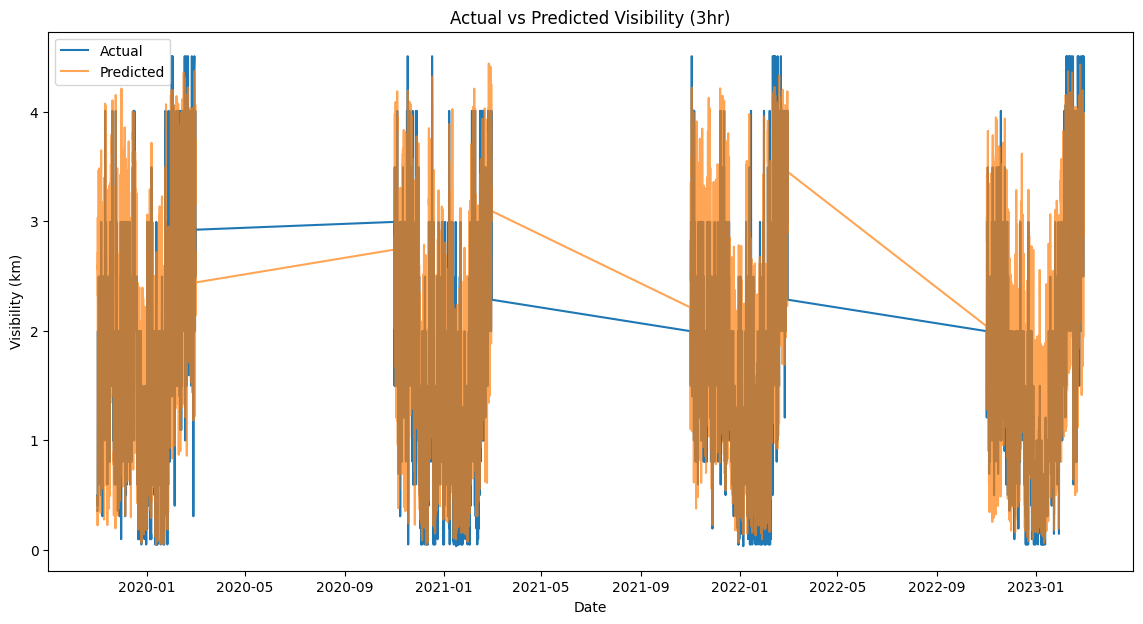

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, test_predictions, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Visibility (3hr)')
plt.xlabel('Date')
plt.ylabel('Visibility (km)')
plt.show()


In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30]     
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_max_depth = best_params['max_depth']
best_n_estimators = best_params['n_estimators']

print(f"Best max_depth: {best_max_depth}")
print(f"Best n_estimators: {best_n_estimators}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .max_depth=None, n_estimators=100;, score=-0.423 total time=  35.8s
[CV 2/5] END .max_depth=None, n_estimators=100;, score=-0.376 total time=  36.2s
[CV 3/5] END .max_depth=None, n_estimators=100;, score=-0.362 total time=  36.5s
[CV 4/5] END .max_depth=None, n_estimators=100;, score=-0.376 total time=  36.8s
[CV 5/5] END .max_depth=None, n_estimators=100;, score=-0.295 total time=  37.5s
[CV 1/5] END .max_depth=None, n_estimators=200;, score=-0.421 total time= 1.2min
[CV 2/5] END .max_depth=None, n_estimators=200;, score=-0.374 total time= 1.2min
[CV 3/5] END .max_depth=None, n_estimators=200;, score=-0.361 total time= 1.2min
[CV 4/5] END .max_depth=None, n_estimators=200;, score=-0.375 total time= 1.2min
[CV 5/5] END .max_depth=None, n_estimators=200;, score=-0.293 total time= 1.2min
[CV 1/5] END .max_depth=None, n_estimators=300;, score=-0.420 total time= 1.8min
[CV 2/5] END .max_depth=None, n_estimators=300;,

In [8]:
# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42,max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [9]:
# Make predictions on the validation set
val_predictions = rf_model.predict(X_val)

# Make predictions on the test set
test_predictions = rf_model.predict(X_test)


In [10]:
# Evaluate the model on the validation set
val_mse = mean_squared_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)

print(f'Validation MSE: {val_mse}')
print(f'Validation R^2: {val_r2}')
print(f'Validation RMSE: {np.sqrt(val_mse)}')

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f'Test MSE: {test_mse}')
print(f'Test R^2: {test_r2}')
print(f'Test RMSE: {np.sqrt(test_mse)}')

Validation MSE: 0.22295323384016175
Validation R^2: 0.7187169527873787
Validation RMSE: 0.47217923910328985
Test MSE: 0.2379770174244204
Test R^2: 0.7530081192111768
Test RMSE: 0.4878288812938615


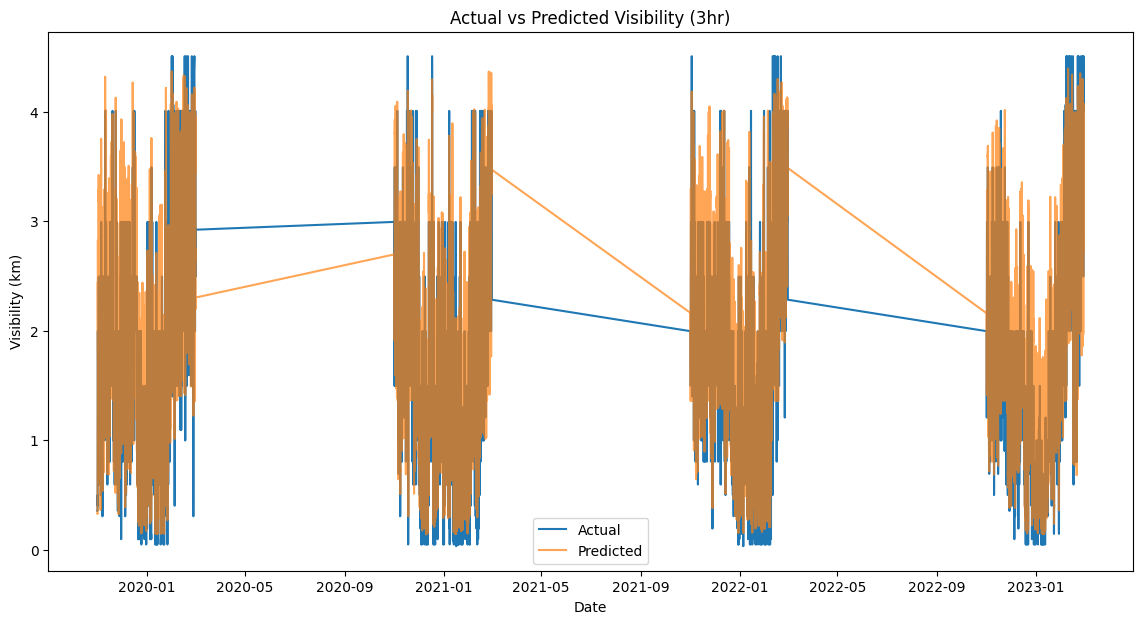

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, test_predictions, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Visibility (3hr)')
plt.xlabel('Date')
plt.ylabel('Visibility (km)')
plt.show()